In [1]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

In [2]:
num_games =4

season18_19 = pd.read_csv(f'../NewData/Avg(18-19)[{num_games}].csv').drop('Unnamed: 0', axis = 1).dropna()
season19_20 = pd.read_csv(f'../NewData/Avg(19-20)[{num_games}].csv').drop('Unnamed: 0', axis = 1).dropna()

In [3]:
merged = season18_19.append(season19_20, ignore_index = False)

In [4]:
merged= merged[(merged['+-'] != 0) & (merged.FDP !=0)]
merged.head(2)

,GameID,Name,Date,Team,FDP,FDS,FD_change,FD_pos,OPP,Home,Away,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-,4_MP,4_FG,4_FGA,4_FG%,4_3P,4_3PA,4_3P%,4_FT,4_FTA,4_FT%,4_ORB,4_DRB,4_TRB,4_AST,4_STL,4_BLK,4_TOV,4_PF,4_PTS,4_+-,4_FDP,4_FDS,NFDP
1138,20181024-cha-chi,Nicolas Batum,20181024.0,cha,25.6,6500.0,-400.0,3.0,chi,1.0,0.0,37.36,6.0,15.0,0.400,1.0,6.0,0.167,0.0,1.0,0.0,0.0,3.0,3.0,4.0,1.0,1.0,3.0,0.0,13.0,14.0,28.6800,3.0,7.75,0.3375,2.0,4.75,0.36625,1.00,1.0,0.50000,0.75,3.25,4.0,2.75,1.00,0.0,1.5,1.5,9.00,-1.25,25.225,7100.0,35.1
1139,20181024-cha-chi,Jeremy Lamb,20181024.0,cha,26.1,5200.0,-300.0,2.0,chi,1.0,0.0,28.08,5.0,9.0,0.556,2.0,3.0,0.667,0.0,0.0,0.0,0.0,3.0,3.0,3.0,1.0,1.0,0.0,2.0,12.0,-7.0,20.6575,3.0,9.25,0.3065,1.0,3.50,0.27075,2.75,3.0,0.70825,0.75,3.25,4.0,1.25,1.25,1.0,0.5,2.0,9.75,2.75,25.400,5325.0,19.8


In [5]:
col = ['MP', 'FG', 'FGA', '3P', '3PA',
        'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK',
        'PTS', '+-', 'FDP']#, 'FDS']
x_col = [f'{num_games}_{i}' for i in col] + ['FDS', 'FD_change']
x_df = merged[[i for i in x_col]]
y_df = merged[['FDP']]

In [6]:
standard = StandardScaler()
x = standard.fit_transform(np.array(x_df))
y = np.array(y_df)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = .8)


### Linear Model

Text(0.5, 0, 'Predictions')

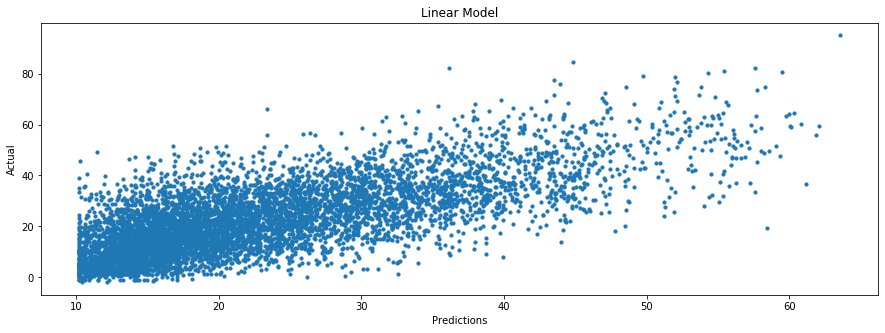

In [7]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predictions = linear.predict(x_test)
plt.figure(figsize = (15,5))
plt.scatter(predictions, y_test, s = 10)
plt.title('Linear Model'); plt.ylabel('Actual'); plt.xlabel('Predictions')

In [8]:
assert False

AssertionError: 

### KNeighbors

In [ ]:
clf = KNeighborsRegressor(n_neigh, weights = 'uniform')
clf.fit(x_train, y_train)

In [ ]:
predictions = clf.predict(x_test)

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(predictions, y_test, s = 10)

In [ ]:
assert False

### Logistic Model 

In [ ]:
logistic_model = LogisticRegression()


x_train, x_test, y_train, y_test = train_test_split()

In [ ]:
linear_model = LinearRegression()